# IBM Data Science Capstone Project
## New York City Current Job Postings Exploration
### by Nuttaphat Arunoprayoch
<hr>

### Objectives
Looking for a job to earn a living is challenging and time consuming, and it might not end up well as expected. Therefore, in order to effectively plan for a career, one must know which career path should be taken. This report analyses job opening positions in NY, USA with a hope that it may be useful individually and socially.

### Data
the data was derived from https://www.kaggle.com/new-york-city/new-york-city-current-job-postings; its metadata can be found at the link provided.
<hr>

## Import Libraries and Dataset

In [68]:
# Standard Libraries
import requests
import calendar
from dateutil import parser
import json, requests
from IPython.display import display, HTML, clear_output, IFrame

# Data Manipulation
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import pandas_profiling

# Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

mpl.style.use(['ggplot']) # optional: for ggplot-like style
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [69]:
# Hide code cells for clean presentation and import display table

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Geolocation Libraries
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium

In [70]:
# Set FourSquare
CLIENT_ID = '#' # your Foursquare ID
CLIENT_SECRET = '#' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [4]:
df = pd.read_csv('dataset/new-york-city-current-job-postings/nyc-jobs.csv')

In [5]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000


<hr>

## Data pre-processing and Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B25C0B0>,
      dtype=object)

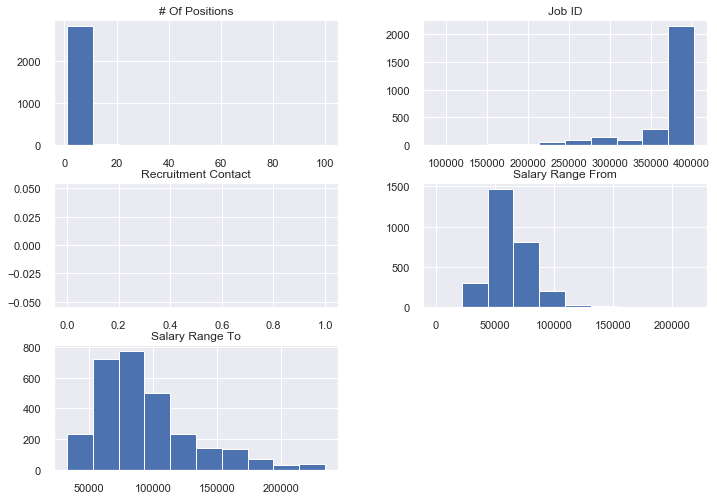

In [13]:
df.hist()

In [7]:
headers = df.columns.tolist()
# headers

In [8]:
# Select only Annual Paying
df = df[df['Salary Frequency'] == 'Annual']

                                                    Salary Range From  \
Business Title                                                          
Deputy Commissioner, Bureau of Customer Services             218587.0   
Deputy Commissioner, Water and Sewer Operations              209585.0   
DHS FIRST DEPUTY COMMISSIONER                                200931.0   
Executive Deputy Commissioner of Operations                  200000.0   
BUDGET ANALYST (OMB)-MANAGERIA                               180472.0   
Deputy Commissioner, Wastewater Treatment                    198518.0   
Deputy Commissioner, Office of Development                   180000.0   
Deputy Commissioner, Office of Policy and Strategy           180000.0   
Chief Compliance Officer                                     185000.0   
Assistant Commissioner, Capital Planning & Deli...           175000.0   

                                                    Salary Range To  \
Business Title                                      

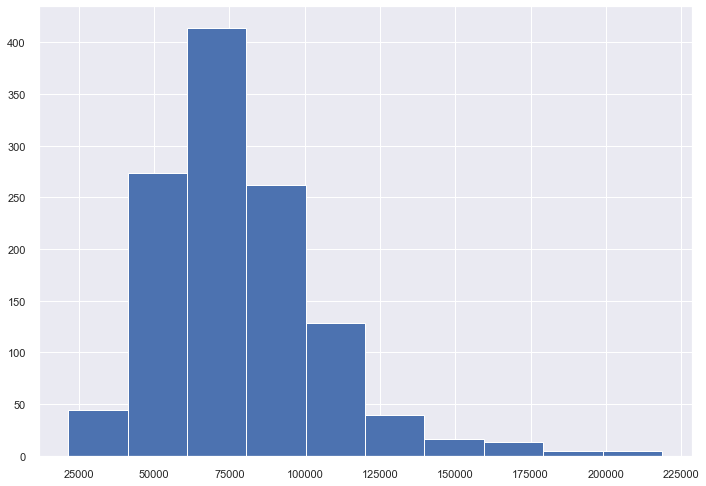

In [14]:
df_grp = df.groupby('Business Title')['Salary Range From', 'Salary Range To'].mean()
df_grp['avg_salary'] = (df_grp['Salary Range From'] + df_grp['Salary Range To']) / 2
df_grp = df_grp.sort_values(by=['avg_salary'], ascending=False)

print(df_grp.head(10))
df_grp['avg_salary'].hist()

As can be seen, the average annual salary is ranged mostly between 50000 and 90000 USD. And the most frequently-paid salary per year is about 60000 USD; which means 5000 USD per month in New York city.

              Business Title  counts
0            Project Manager      38
1   Assistant Civil Engineer      26
2        ACCOUNTABLE MANAGER      26
3   Engineering Technician I      20
4                   Director      20
5  Assistant General Counsel      19
6             Budget Analyst      14
7      Community Coordinator      14
8               Investigator      14
9  Confidential Investigator      14


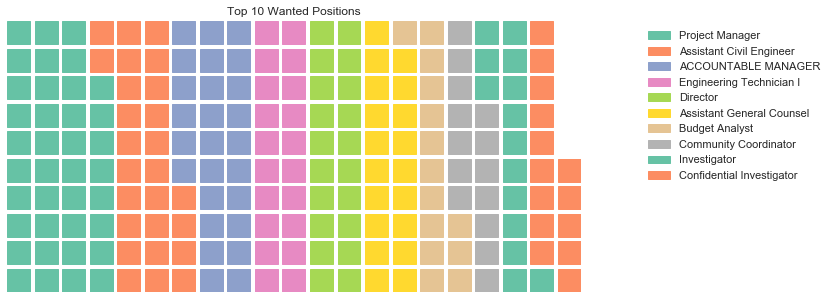

In [15]:
df_count = df.groupby('Business Title').size().reset_index(name='counts')
df_count_top_10 = df_count.sort_values(by=['counts'], ascending=False)[:10].reset_index(drop=True)

keys = [i for i in df_count_top_10['Business Title']]
values = [i for i in df_count_top_10['counts']]
waffle_data = dict(zip(keys, values))

ax = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=waffle_data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

plt.title('Top 10 Wanted Positions')
print(df_count_top_10)

The waffle chart above indicates that the most wanted position is <b>Project manager</b> followed by <b>Assistant Civil Engineer</b>, <b>Accoutable Manager</b>, and so on. Additionally, as can be observed, the positions are widely ranged from various professional areas.

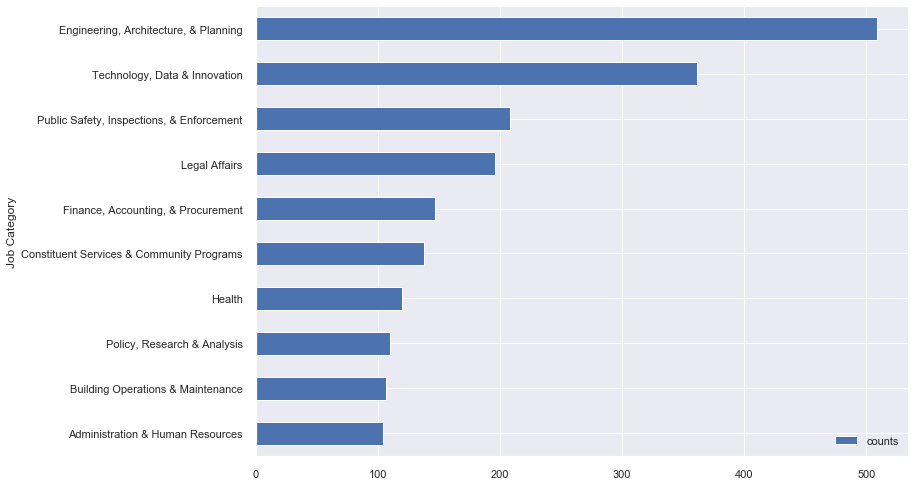

In [16]:
df_job = df.groupby('Job Category').size().reset_index(name='counts')
df_job_top_10 = df_job.sort_values(by=['counts'], ascending=False)[:10].set_index('Job Category')

ax = df_job_top_10.plot(kind='barh')
ax.invert_yaxis()

According to the collected data, the most wanted job areas are <b>Engineering</b>, closely followed by <b> Techonology and Data Related Job</b>. Therefore, one should be considering taking a career path in Engineering and Technology seriously.

                                                   Salary Range From  \
new Job Category                                                       
Administration & Human Resources Finance                    218587.0   
Administration & Human Resources Constituent                200000.0   
Communications & Intergovernmental Affairs                  180472.0   
Engineering, Architecture, & Planning Maintenance           198518.0   
Engineering, Architecture, & Planning Finance               192292.5   

                                                   Salary Range To       avg  
new Job Category                                                              
Administration & Human Resources Finance                  218587.0  218587.0  
Administration & Human Resources Constituent              210000.0  205000.0  
Communications & Intergovernmental Affairs                225217.0  202844.5  
Engineering, Architecture, & Planning Maintenance         198518.0  198518.0  
Engineering, Architec

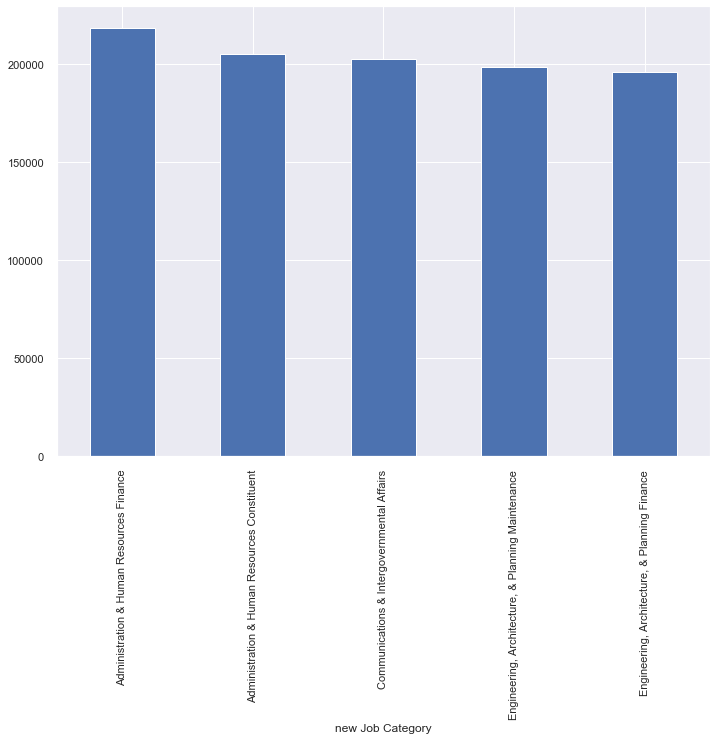

In [17]:
df_job_salary = df.groupby('Job Category')['Salary Range From', 'Salary Range To'].mean()
df_job_salary['avg'] = (df_job_salary['Salary Range From'] + df_job_salary['Salary Range To']) / 2
df_job_salary = df_job_salary.sort_values(by=['avg'], ascending=False)[:5]
df_job_salary['new Job Category'] = ['Administration & Human Resources Finance',
                                'Administration & Human Resources Constituent',
                                'Communications & Intergovernmental Affairs',
                                'Engineering, Architecture, & Planning Maintenance',
                                'Engineering, Architecture, & Planning Finance']
df_job_salary = df_job_salary.set_index('new Job Category')
print(df_job_salary.head())

ax = df_job_salary['avg'].plot.bar()

Furthermore, the most well-paid job areas including <b> Administration, HR, Accounting, Legal, Engineering, Architecture, etc. </b>

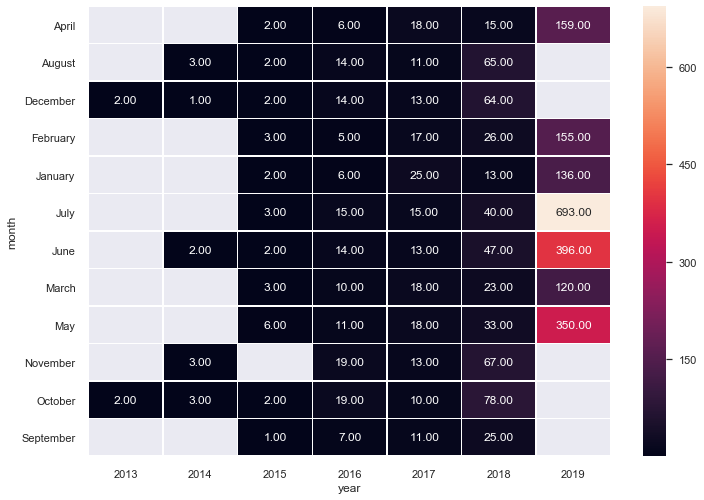

In [18]:
df_date = df[['Job Category', 'Posting Date']].dropna().reset_index(drop=True)
df_date['Posting Date'] = df_date['Posting Date'].apply(lambda s: parser.parse(s))
df_date['month'] = df_date['Posting Date'].apply(lambda t: calendar.month_name[t.month])
df_date['year'] = df_date['Posting Date'].apply(lambda t: t.year)

df_date_grp = df_date.groupby(['month', 'year'])['Job Category'].size().reset_index(name='counts')
df_date_grp = df_date_grp.sort_values(by=['month'])

df_date_grp = df_date_grp.pivot('month', 'year', 'counts')
sns.heatmap(df_date_grp, annot=True, fmt='.2f', linewidths=.5)

Additionally, the job seekers should bear in mind that positions are widely in <b> May, June, July </b>. Hence, it is a good time for applying for your desired positions. Especially, in <b> July </b> which holds a significantly high number of job posting (2019).

In [63]:
NY_area = list(set(df['Work Location'].tolist())) # Gather Work Locations

In [64]:
latitude, longitude = 40.7128, -74.0060
search_query = 'Coffee'
radius = 500

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
# dataframe.head()

In [65]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

# dataframe_filtered

And just in case, you're in New York City and looking for a job. I would recommend you to warm up your day by taking a good cup of coffee before your interview or else. Enjoy your day.

In [66]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.Marker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.Marker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


# display map
venues_map

<hr>

## Summary

Exploratoy Data Analysis reveals various interesting points from the job market. It is clearly that <b>Project Managers</b> were highlly wanted. Furthermore, the area of <b>Engineering and Technology </b> have frequently dominated the job market in NY city.

In a nutshell, <b>Engineering and Technology</b> career might give you an upper-hand in job searching, and don't forget to apply a job during May, June, July for better chance of getting a job due to its high number of job posting. Good luck.